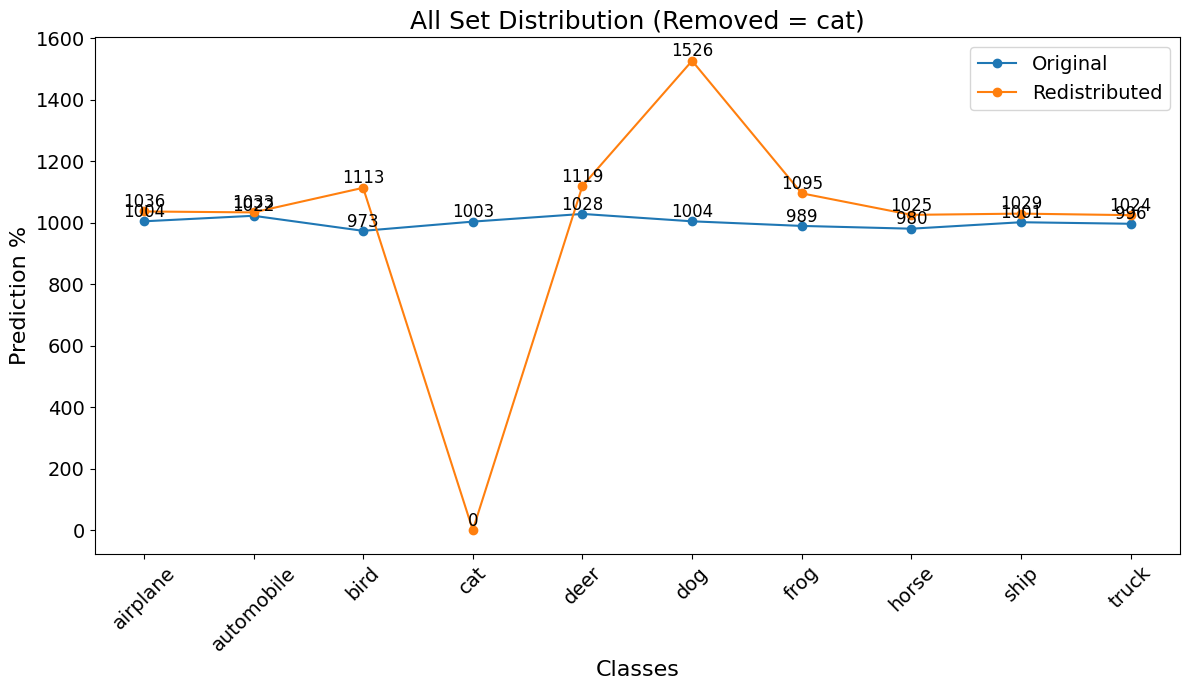

   Class Index  Class Name  Original Count  Redistributed Count
0            0    airplane            1004                 1036
1            1  automobile            1022                 1033
2            2        bird             973                 1113
3            3         cat            1003                    0
4            4        deer            1028                 1119
5            5         dog            1004                 1526
6            6        frog             989                 1095
7            7       horse             980                 1025
8            8        ship            1001                 1029
9            9       truck             996                 1024


In [3]:
from lib.utils import model_results_from_npz, compare_results, ResultVersion

CIFAR10_CLASSES = [
    "airplane","automobile","bird","cat","deer",
    "dog","frog","horse","ship","truck"
]
NUM_CLASSES = len(CIFAR10_CLASSES)

SEED = 637
EPOCHS = 50
REMOVED_CLASS = 3

model_ori = model_results_from_npz(f"../results/cifar10/cifar_resnet_s{SEED}_e{EPOCHS}.npz", NUM_CLASSES)
model_retrain = model_results_from_npz(f"../results/cifar10/cifar_resnet_s{SEED}_e{EPOCHS}_r{REMOVED_CLASS}.npz", NUM_CLASSES)
model_redis = model_results_from_npz(f"../results/redis_cifar10/cifar_resnet_s{SEED}_e{EPOCHS}_rd{REMOVED_CLASS}.npz", NUM_CLASSES)

ori_version = ResultVersion(model_ori, "Original")
retrain_version = ResultVersion(model_retrain, "Retrained")
redis_version = ResultVersion(model_redis, "Redistributed")

compare_mode = "all"

out_csv = f"../analytics/CIFAR10/charts/{compare_mode}_comparison_s{SEED}_e{EPOCHS}_r{REMOVED_CLASS}.csv"
out_png = f"../analytics/CIFAR10/charts/{compare_mode}_comparison_s{SEED}_e{EPOCHS}_r{REMOVED_CLASS}.png"

df_summary = compare_results(
    classes=CIFAR10_CLASSES,
    #results=[ori_version, retrain_version, redis_version],
    #results=[retrain_version, redis_version],
    results=[ori_version, redis_version],
    removed_idx=REMOVED_CLASS,
    seed=SEED,
    mode=compare_mode,
    out_csv=out_csv,
    out_png=out_png,
)

print(df_summary)